Define whether a correlation exists between the quantity of home team attendance and the home team score.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

# IMPORT CSV DATASET

In [72]:
df_games = pd.read_csv('AssignmentData/games.csv')
df_club_games = pd.read_csv('AssignmentData/club_games.csv')

In [73]:
df_games.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,...,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,...,Metallurg,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,...,Arena Khimki,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,NaN,NaN,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,...,RZD Arena,11408.0,Sergey Karasev,https://www.transfermarkt.co.uk/lokomotiv-mosc...,NaN,NaN,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,...,Metallurg,7534.0,Timur Arslanbekov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league


In [74]:
df_games.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

### Select usefull columns only
Clean useless columns

In [75]:
df_games_cleaned = df_games[[
    'game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'stadium', 'attendance', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'
]].copy()

In [76]:
df_games_cleaned.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,Akhmat-Arena,21700.0,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,10.0,Metallurg,11400.0,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,13.0,Arena Khimki,12000.0,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,8.0,RZD Arena,11408.0,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,16.0,Metallurg,7534.0,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league


### Select the most frequent home team in games dataset

In [77]:
counts = df_games_cleaned['home_club_id'].value_counts()
# Find the most frequent value
most_frequent = counts.idxmax()
# Filter the DataFrame to select rows with the most frequent value
most_frequent_home_club_in_game = df_games_cleaned[df_games_cleaned['home_club_id'] == most_frequent]

In [78]:
most_frequent_home_club_in_game

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_name,away_club_name,aggregate,competition_type
1374,2243042,ES1,2012,14. Matchday,2012-12-01,418,13,2,0,3.0,2.0,Santiago Bernabéu,79000.0,Real Madrid Club de Fútbol,Club Atlético de Madrid S.A.D.,2:0,domestic_league
1409,2341054,ES1,2013,18. Matchday,2014-01-06,418,940,3,0,3.0,18.0,Santiago Bernabéu,65217.0,Real Madrid Club de Fútbol,Real Club Celta de Vigo S. A. D.,3:0,domestic_league
1444,2481145,SUC,2014,final 1st leg,2014-08-19,418,13,1,1,NaN,NaN,Santiago Bernabéu,75897.0,Real Madrid Club de Fútbol,Club Atlético de Madrid S.A.D.,1:1,other
1492,2618536,CL,2015,Group A,2015-09-15,418,660,4,0,NaN,NaN,Santiago Bernabéu,66389.0,Real Madrid Club de Fútbol,FC Shakhtar Donetsk,4:0,international_cup
1538,2878317,SUC,2017,final 2nd leg,2017-08-16,418,131,2,0,NaN,NaN,Santiago Bernabéu,70000.0,Real Madrid Club de Fútbol,Futbol Club Barcelona,2:0,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63264,4113073,ES1,2023,7. Matchday,2023-09-27,418,472,2,0,2.0,18.0,Santiago Bernabéu,65017.0,Real Madrid Club de Fútbol,Unión Deportiva Las Palmas S.A.D.,2:0,domestic_league
63297,4001330,SUC,2023,Final,2023-01-15,418,131,1,3,NaN,NaN,King Fahd International Stadium,68752.0,Real Madrid Club de Fútbol,Futbol Club Barcelona,1:3,other
63316,3998376,SUC,2023,Semi-Finals,2023-01-11,418,1049,5,4,NaN,NaN,King Fahd International Stadium,50492.0,Real Madrid Club de Fútbol,Valencia Club de Fútbol S. A. D.,5:4,other
64950,2594621,ES1,2015,16. Matchday,2015-12-20,418,367,10,2,3.0,18.0,Santiago Bernabéu,61564.0,Real Madrid Club de Fútbol,Rayo Vallecano de Madrid S.A.D.,10:2,domestic_league


In [79]:
df_games_cleaned

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,Akhmat-Arena,21700.0,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,10.0,Metallurg,11400.0,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,13.0,Arena Khimki,12000.0,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,8.0,RZD Arena,11408.0,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,16.0,Metallurg,7534.0,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65211,2367292,EL,2013,Group B,2013-11-07,383,419,2,0,NaN,NaN,Philips Stadion,10000.0,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,2:0,international_cup
65212,2629035,NLP,2015,Third Round,2015-10-27,383,16866,6,0,NaN,NaN,Philips Stadion,31000.0,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,6:0,domestic_cup
65213,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,NaN,NaN,Philips Stadion,34200.0,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,3:0,international_cup
65214,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,NaN,bet365 Stadium,9410.0,Stoke City,NaN,6:1,other


In [80]:
df_games_cleaned = pd.merge(most_frequent_home_club_in_game, df_club_games[['game_id', 'hosting']], on='game_id', how='inner')
df_games_cleaned

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_name,away_club_name,aggregate,competition_type,hosting
0,2243042,ES1,2012,14. Matchday,2012-12-01,418,13,2,0,3.0,2.0,Santiago Bernabéu,79000.0,Real Madrid Club de Fútbol,Club Atlético de Madrid S.A.D.,2:0,domestic_league,Home
1,2243042,ES1,2012,14. Matchday,2012-12-01,418,13,2,0,3.0,2.0,Santiago Bernabéu,79000.0,Real Madrid Club de Fútbol,Club Atlético de Madrid S.A.D.,2:0,domestic_league,Away
2,2341054,ES1,2013,18. Matchday,2014-01-06,418,940,3,0,3.0,18.0,Santiago Bernabéu,65217.0,Real Madrid Club de Fútbol,Real Club Celta de Vigo S. A. D.,3:0,domestic_league,Home
3,2341054,ES1,2013,18. Matchday,2014-01-06,418,940,3,0,3.0,18.0,Santiago Bernabéu,65217.0,Real Madrid Club de Fútbol,Real Club Celta de Vigo S. A. D.,3:0,domestic_league,Away
4,2481145,SUC,2014,final 1st leg,2014-08-19,418,13,1,1,NaN,NaN,Santiago Bernabéu,75897.0,Real Madrid Club de Fútbol,Club Atlético de Madrid S.A.D.,1:1,other,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,3998376,SUC,2023,Semi-Finals,2023-01-11,418,1049,5,4,NaN,NaN,King Fahd International Stadium,50492.0,Real Madrid Club de Fútbol,Valencia Club de Fútbol S. A. D.,5:4,other,Away
630,2594621,ES1,2015,16. Matchday,2015-12-20,418,367,10,2,3.0,18.0,Santiago Bernabéu,61564.0,Real Madrid Club de Fútbol,Rayo Vallecano de Madrid S.A.D.,10:2,domestic_league,Home
631,2594621,ES1,2015,16. Matchday,2015-12-20,418,367,10,2,3.0,18.0,Santiago Bernabéu,61564.0,Real Madrid Club de Fútbol,Rayo Vallecano de Madrid S.A.D.,10:2,domestic_league,Away
632,2594631,ES1,2015,17. Matchday,2015-12-30,418,681,3,1,3.0,15.0,Santiago Bernabéu,60907.0,Real Madrid Club de Fútbol,Real Sociedad de Fútbol S.A.D.,3:1,domestic_league,Home


### Estimate the quantity of the home team attendance
The percentage of available seats for away fans are defined by insitutions like UEFA or Premier League. 
That is around the 10% of the total stadium capability.

In [81]:
away_attendance_percentage = 0.10 # 10% of attendance
# df_games_cleaned['home_team_attendance'] = df_games_cleaned['attendance'] * ( 1 - away_attendance_percentage ) if df_games_cleaned['hosting'] == 'Home' else df_games_cleaned['attendance'] * ( away_attendance_percentage )
df_games_cleaned['home_team_attendance'] = df_games_cleaned.apply(lambda row: row['attendance'] * ( 1 - away_attendance_percentage ) if row['hosting'] == 'Home' else row['attendance'] * away_attendance_percentage, axis=1 )
df_games_cleaned

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_name,away_club_name,aggregate,competition_type,hosting,home_team_attendance
0,2243042,ES1,2012,14. Matchday,2012-12-01,418,13,2,0,3.0,2.0,Santiago Bernabéu,79000.0,Real Madrid Club de Fútbol,Club Atlético de Madrid S.A.D.,2:0,domestic_league,Home,71100.0
1,2243042,ES1,2012,14. Matchday,2012-12-01,418,13,2,0,3.0,2.0,Santiago Bernabéu,79000.0,Real Madrid Club de Fútbol,Club Atlético de Madrid S.A.D.,2:0,domestic_league,Away,7900.0
2,2341054,ES1,2013,18. Matchday,2014-01-06,418,940,3,0,3.0,18.0,Santiago Bernabéu,65217.0,Real Madrid Club de Fútbol,Real Club Celta de Vigo S. A. D.,3:0,domestic_league,Home,58695.3
3,2341054,ES1,2013,18. Matchday,2014-01-06,418,940,3,0,3.0,18.0,Santiago Bernabéu,65217.0,Real Madrid Club de Fútbol,Real Club Celta de Vigo S. A. D.,3:0,domestic_league,Away,6521.7
4,2481145,SUC,2014,final 1st leg,2014-08-19,418,13,1,1,NaN,NaN,Santiago Bernabéu,75897.0,Real Madrid Club de Fútbol,Club Atlético de Madrid S.A.D.,1:1,other,Home,68307.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,3998376,SUC,2023,Semi-Finals,2023-01-11,418,1049,5,4,NaN,NaN,King Fahd International Stadium,50492.0,Real Madrid Club de Fútbol,Valencia Club de Fútbol S. A. D.,5:4,other,Away,5049.2
630,2594621,ES1,2015,16. Matchday,2015-12-20,418,367,10,2,3.0,18.0,Santiago Bernabéu,61564.0,Real Madrid Club de Fútbol,Rayo Vallecano de Madrid S.A.D.,10:2,domestic_league,Home,55407.6
631,2594621,ES1,2015,16. Matchday,2015-12-20,418,367,10,2,3.0,18.0,Santiago Bernabéu,61564.0,Real Madrid Club de Fútbol,Rayo Vallecano de Madrid S.A.D.,10:2,domestic_league,Away,6156.4
632,2594631,ES1,2015,17. Matchday,2015-12-30,418,681,3,1,3.0,15.0,Santiago Bernabéu,60907.0,Real Madrid Club de Fútbol,Real Sociedad de Fútbol S.A.D.,3:1,domestic_league,Home,54816.3


### Calculate the average of attendance of home team

In [82]:
mean_home_team_attendance = df_games_cleaned['home_team_attendance'].median()
print('mean_home_team_attendance = \"' + str(mean_home_team_attendance) + '\"')

mean_home_team_attendance = "9863.5"


### Calculate the deviation from the mean for each value

In [83]:
df_games_cleaned.loc[:, 'deviation_from_median'] = df_games_cleaned['home_team_attendance'] - mean_home_team_attendance

### Calculate the mean of the deviation to set a significant thresholds

In [84]:
df_games_cleaned['deviation_from_median'].mean()

22210.572183098593

### Define thresholds and categorize values

In [85]:
# Define bins and labels based on deviation from the median
bins = [float('-inf'), -10000, -5000, 0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, float('inf')]
labels = ['T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13']

# Categorize based on deviation from median
df_games_cleaned['home_team_attendance_category'] = pd.cut(df_games_cleaned['deviation_from_median'], bins=bins, labels=labels)
df_games_cleaned

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,home_club_name,away_club_name,aggregate,competition_type,hosting,home_team_attendance,deviation_from_median,home_team_attendance_category
0,2243042,ES1,2012,14. Matchday,2012-12-01,418,13,2,0,3.0,...,Santiago Bernabéu,79000.0,Real Madrid Club de Fútbol,Club Atlético de Madrid S.A.D.,2:0,domestic_league,Home,71100.0,61236.5,T13
1,2243042,ES1,2012,14. Matchday,2012-12-01,418,13,2,0,3.0,...,Santiago Bernabéu,79000.0,Real Madrid Club de Fútbol,Club Atlético de Madrid S.A.D.,2:0,domestic_league,Away,7900.0,-1963.5,T2
2,2341054,ES1,2013,18. Matchday,2014-01-06,418,940,3,0,3.0,...,Santiago Bernabéu,65217.0,Real Madrid Club de Fútbol,Real Club Celta de Vigo S. A. D.,3:0,domestic_league,Home,58695.3,48831.8,T12
3,2341054,ES1,2013,18. Matchday,2014-01-06,418,940,3,0,3.0,...,Santiago Bernabéu,65217.0,Real Madrid Club de Fútbol,Real Club Celta de Vigo S. A. D.,3:0,domestic_league,Away,6521.7,-3341.8,T2
4,2481145,SUC,2014,final 1st leg,2014-08-19,418,13,1,1,NaN,...,Santiago Bernabéu,75897.0,Real Madrid Club de Fútbol,Club Atlético de Madrid S.A.D.,1:1,other,Home,68307.3,58443.8,T13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,3998376,SUC,2023,Semi-Finals,2023-01-11,418,1049,5,4,NaN,...,King Fahd International Stadium,50492.0,Real Madrid Club de Fútbol,Valencia Club de Fútbol S. A. D.,5:4,other,Away,5049.2,-4814.3,T2
630,2594621,ES1,2015,16. Matchday,2015-12-20,418,367,10,2,3.0,...,Santiago Bernabéu,61564.0,Real Madrid Club de Fútbol,Rayo Vallecano de Madrid S.A.D.,10:2,domestic_league,Home,55407.6,45544.1,T12
631,2594621,ES1,2015,16. Matchday,2015-12-20,418,367,10,2,3.0,...,Santiago Bernabéu,61564.0,Real Madrid Club de Fútbol,Rayo Vallecano de Madrid S.A.D.,10:2,domestic_league,Away,6156.4,-3707.1,T2
632,2594631,ES1,2015,17. Matchday,2015-12-30,418,681,3,1,3.0,...,Santiago Bernabéu,60907.0,Real Madrid Club de Fútbol,Real Sociedad de Fútbol S.A.D.,3:1,domestic_league,Home,54816.3,44952.8,T11


### Extract Goals from 'aggregate' Column

In [86]:
df_games_cleaned[['home_goals', 'away_goals']] = df_games_cleaned['aggregate'].str.split(':', expand=True).astype(int)

### Calculate the Mean for each group

In [87]:
# Group by the attendance category and calculate the mean home goals for each category
category_means = df_games_cleaned.groupby('home_team_attendance_category', observed=True)['home_goals'].mean().reset_index()
category_means.columns = ['home_team_attendance_category', 'mean_home_goals']
print(category_means)

   home_team_attendance_category  mean_home_goals
0                             T1         2.606061
1                             T2         2.725100
2                             T3         2.000000
3                             T4         4.666667
4                             T5         0.500000
5                             T6         2.000000
6                             T7         2.125000
7                             T8         2.285714
8                             T9         3.181818
9                            T10         2.541667
10                           T11         2.937500
11                           T12         3.125000
12                           T13         2.579310


### Calculate the Correlation Coefficient
Calculate the Pearson correlation coefficient between 'deviation_from_median' and 'home_goals'

In [88]:
correlation_coef = np.corrcoef(category_means['mean_home_goals'], df_games_cleaned.groupby('home_team_attendance_category', observed=True)['deviation_from_median'].mean())[0, 1]
print('Correlation Coefficient:', correlation_coef)

Correlation Coefficient: 0.11467279604835634


### Scatter Plot with Means

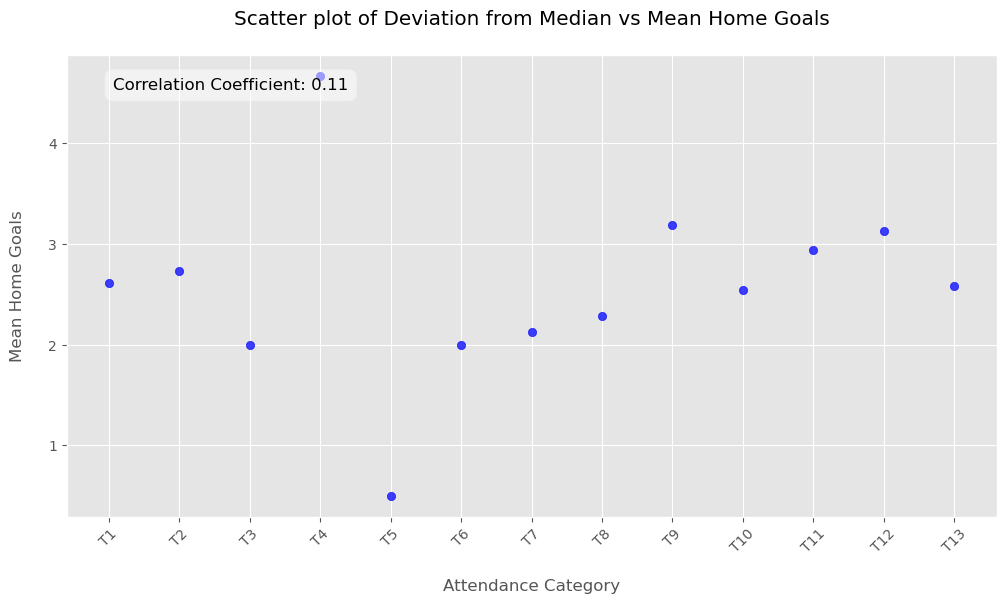

In [89]:
# Approximate the correlation coefficient value
correlation_text = f'Correlation Coefficient: {correlation_coef:.2f}'

# Scatter plot of deviation from median vs mean home goals
plt.figure(figsize=(12, 6))
plt.scatter(category_means['home_team_attendance_category'], category_means['mean_home_goals'], alpha=0.75, color='b')
plt.title('Scatter plot of Deviation from Median vs Mean Home Goals\n')
plt.xlabel('\nAttendance Category')
plt.ylabel('Mean Home Goals\n')
plt.xticks(rotation=45)
plt.grid(True)


# Annotate the plot with correlation coefficient
plt.annotate(correlation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))

plt.show()

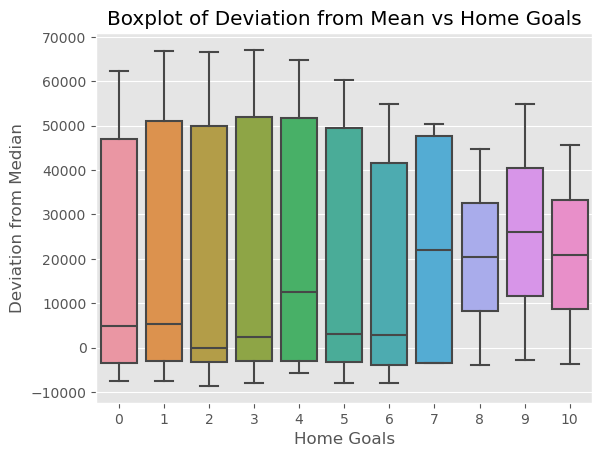

In [90]:
sns.boxplot(x='home_goals', y='deviation_from_median', data=df_games_cleaned)
plt.title('Boxplot of Deviation from Mean vs Home Goals')
plt.xlabel('Home Goals')
plt.ylabel('Deviation from Median')
plt.show()

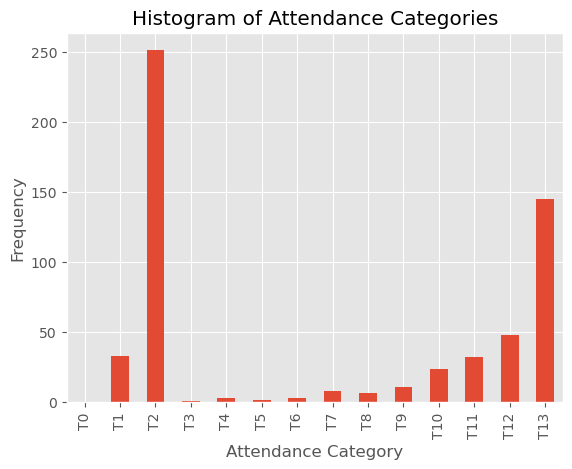

In [91]:
df_games_cleaned['home_team_attendance_category'].value_counts().sort_index().plot(kind='bar')
plt.title('Histogram of Attendance Categories')
plt.xlabel('Attendance Category')
plt.ylabel('Frequency')
plt.show()